In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from tabulate import tabulate
df = pd.read_csv("EPL.csv")


In [126]:
df.fillna(df.mean(numeric_only=True), inplace=True)

In [127]:
df["TotalGoals"] = df["FullTimeHomeTeamGoals"] + df["FullTimeAwayTeamGoals"]
df["GoalDifference"] = df["FullTimeHomeTeamGoals"] - df["FullTimeAwayTeamGoals"]
df["WinRate"] = df["HomeTeamPoints"] / (df["HomeTeamPoints"] + df["AwayTeamPoints"])

features = df[["TotalGoals", "GoalDifference", "WinRate"]]

In [128]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [129]:
nbrs = NearestNeighbors(n_neighbors=10, metric='euclidean').fit(scaled_features)
distances, indices = nbrs.kneighbors(scaled_features)

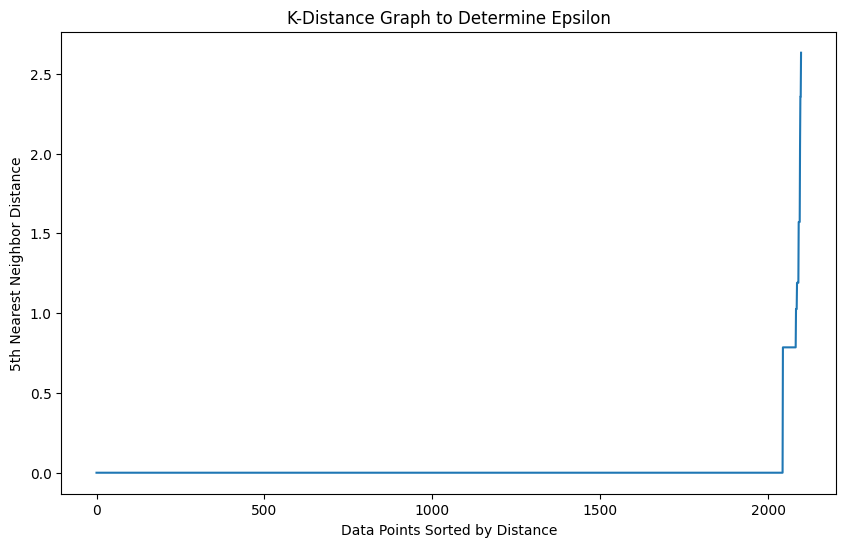

In [130]:
distances = np.sort(distances[:, 9])
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel('5th Nearest Neighbor Distance')
plt.title('K-Distance Graph to Determine Epsilon')
plt.show()

In [131]:
dbscan = DBSCAN(eps=0.5, min_samples=5, metric='euclidean')
df["Cluster"] = dbscan.fit_predict(scaled_features)

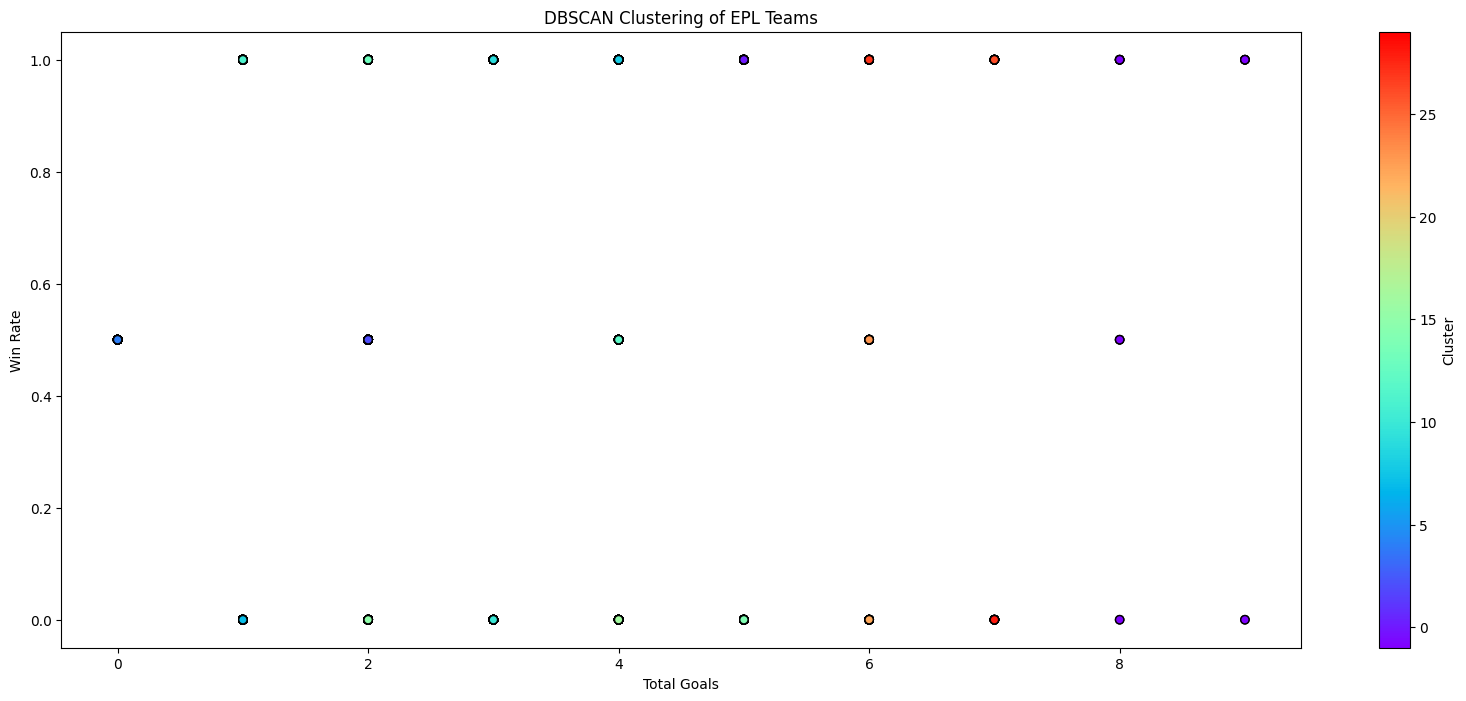

In [132]:
plt.figure(figsize=(20, 8))
plt.scatter(df["TotalGoals"], df["WinRate"], c=df["Cluster"], cmap="rainbow", edgecolors='k')
plt.xlabel("Total Goals")
plt.ylabel("Win Rate")
plt.title("DBSCAN Clustering of EPL Teams")
plt.colorbar(label="Cluster")
plt.show()

In [133]:
if len(set(df["Cluster"])) > 1:
    silhouette_avg = silhouette_score(scaled_features, df["Cluster"])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("DBSCAN detected only one cluster or noise, making silhouette score irrelevant.")

Silhouette Score: 0.97238723605072


In [134]:
print(tabulate(df[["HomeTeam", "TotalGoals", "GoalDifference", "WinRate", "Cluster"]].head(10), headers="keys", tablefmt="github", showindex=False))

| HomeTeam       |   TotalGoals |   GoalDifference |   WinRate |   Cluster |
|----------------|--------------|------------------|-----------|-----------|
| Liverpool      |            5 |                3 |       1   |         0 |
| West Ham       |            5 |               -5 |       0   |         1 |
| Bournemouth    |            2 |                0 |       0.5 |         2 |
| Burnley        |            3 |                3 |       1   |         3 |
| Crystal Palace |            0 |                0 |       0.5 |         4 |
| Watford        |            3 |               -3 |       0   |         5 |
| Tottenham      |            4 |                2 |       1   |         6 |
| Leicester      |            0 |                0 |       0.5 |         4 |
| Newcastle      |            1 |               -1 |       0   |         7 |
| Man United     |            4 |                4 |       1   |         8 |
